# Hexagonal hole hexagonal lattice

## Initial geometry

In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use("science")
mpl.rcParams.update({"font.size": 46})

In [2]:
import sys
sys.path.append("/home/ben/Desktop/MSc thesis/github/Thesis_name/Simulations/")
from ExternalFunctions import (plot_unit_cell_cross_sections, geom_hexagon_PCS,
                              plot_epsilon_XY, geom_hexagon_PCS_slope, hexagonal_lattice_bands)

In [3]:
save = False
plot = False
simulate = False

In [4]:
resolution = 16
num_bands = 1

From PNAS paper, we know that the unit cell looks like this:

<img src="media/hexagonal_unit_cell.png" width="100">

In [5]:
a = 405 # nm
t = 180 / a
scaling = (1-t)*0.5

In [6]:
sx = 1 
sy = 1 
sz = 10
cell = mp.Vector3(sx, sy, sz)

In [7]:
parameters = [a, t, scaling]
geometry, geometry_lattice = geom_hexagon_PCS (parameters, cell)

In [8]:
sim_params = resolution, cell, geometry
if plot == True:
    fig,  ax = plot_unit_cell_cross_sections(a, sim_params)

It is distorted because our basis is not square in this case!

In [9]:
num_bands = 1
k_point = mp.Vector3(0.0,0.0,0.0)

sim_params = [geometry_lattice,  k_point, geometry, resolution, num_bands]

num_period = 3

xlim = [-520,520]
ylim = [-520,520]

title = 'XY cross section of 3 unit cells of the PCS'

if plot == True:
    fig, ax = plot_epsilon_XY (sim_params, a, num_period, xlim,  ylim, title, custom_material=False)

As we can see, rectifying th basis yields the correct crystal!

## Geometry with fabrication slope

In [10]:
dielec_const = 1.9935
alpha = 7.9 * np.pi / 180
params = dielec_const, t, alpha, geometry_lattice

custom_material = True

In [11]:
eps_func = geom_hexagon_PCS_slope(params)
default_material = eps_func

-----------
Initializing structure...
time for choose_chunkdivision = 5.96046e-06 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 10 with resolution 16
subpixel-averaging is 30.0866% done, 9.40375 s remaining
subpixel-averaging is 62.3246% done, 2.47409 s remaining
subpixel-averaging is 96.7117% done, 0.137068 s remaining
subpixel-averaging is 38.6834% done, 6.65826 s remaining
subpixel-averaging is 77.369% done, 1.20587 s remaining
subpixel-averaging is 38.6834% done, 6.63731 s remaining
subpixel-averaging is 77.369% done, 1.23128 s remaining
time for set_epsilon = 34.2397 s
-----------


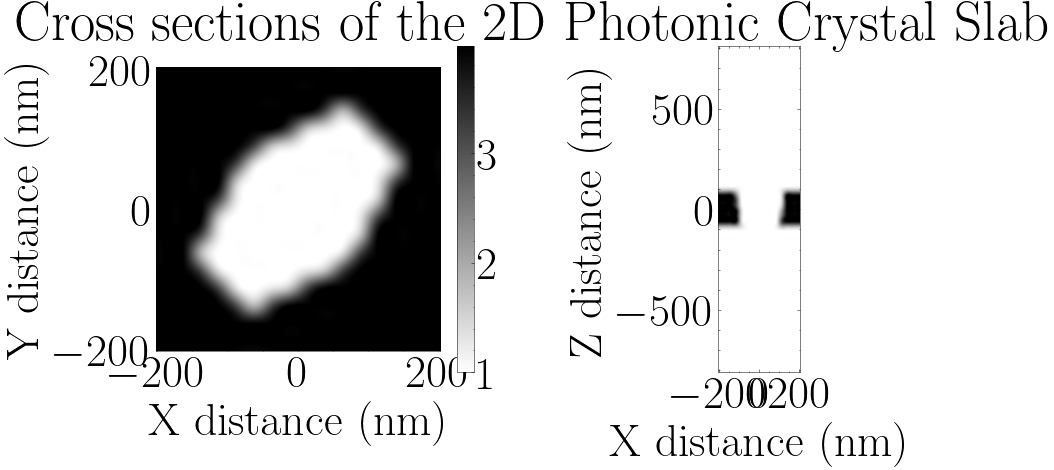

In [12]:
sim_params = resolution, cell, default_material

fig, ax = plot_unit_cell_cross_sections(a, sim_params, custom_material = True)

As we can see we succesfully introduce the slope to the PC!

In [13]:
num_bands = 1
k_point = mp.Vector3(0.0,0.0,0.0)

sim_params = [geometry_lattice,  k_point, default_material, resolution, num_bands]

num_period = 3

xlim = [-520,520]
ylim = [-520,520]

title = 'XY cross section of 3 unit cells of the PCS'

if plot == True:
    fig, ax = plot_epsilon_XY (sim_params, a, num_period, xlim,  ylim, title, custom_material=True)

## Band calculation

In [14]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/MSc thesis/github/Thesis_name/Simulations/04_Photonic_Crystal_Slabs/Hexagonal_Hole_Hexagonal_Lattice


In [15]:
f1 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands.dat", delimiter=",")[1:,1:]
f2 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands_TE.dat", delimiter=",")[1:,1:]
f3 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands_TM.dat", delimiter=",")[1:,1:]

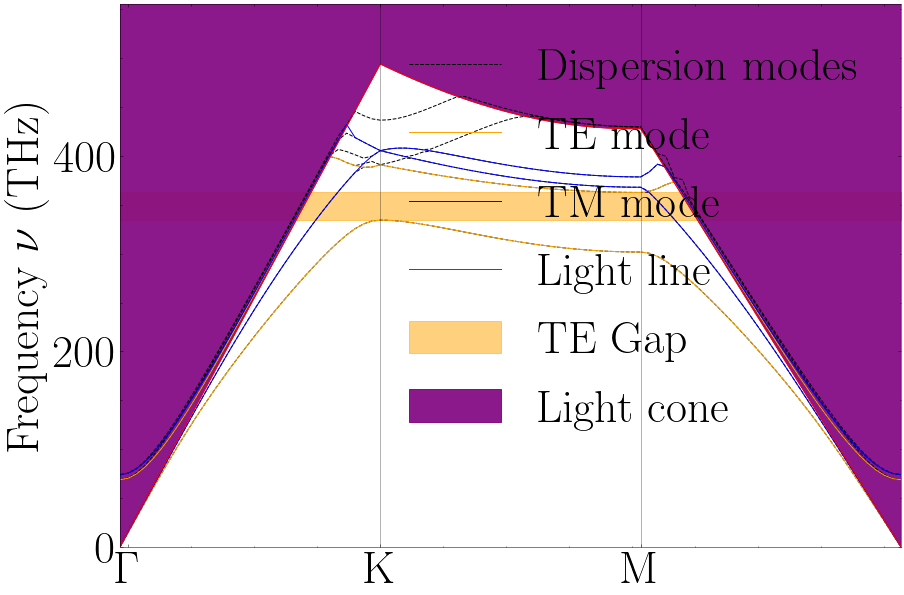

In [16]:
files = [f1,f2,f3]

fig, ax = hexagonal_lattice_bands(a* 1e-9, files) #because in nanometers
ax.legend(loc=0)

In [17]:
save = True
if save == True:
    fig.savefig('results/band_diagram_hexagonal_lattice.pdf')

In [51]:
def hexagonal_lattice_bands(a, files):

    f1, f2, f3 = files

    fig, ax = plt.subplots(figsize=(14, 10))

    light_speed = 3e8

    w_to_n = light_speed / (a * 10 ** 12)

    #for i in range(1, 7):
    #
    #    if i == 1:
    #        ax.plot(
    #            np.linspace(0, len(f1[:, 1]) - 1, len(f1[:, 1])),
    #            f1[:, -i] * (w_to_n),
    #            c="black",
    #            linestyle="dashed",
    #            label="Dispersion modes",
    #        )
    #    else:
    #        ax.plot(
    #            np.linspace(0, len(f1[:, 1]) - 1, len(f1[:, 1])),
    #            f1[:, -i] * (w_to_n),
    #            c="black",
    #            linestyle="dashed",
    #        )

    ax.plot(
        np.linspace(0, len(f2[:, 1]) - 1, len(f2[:, 1])),
        f2[:, -1] * (w_to_n),
        c="red",
        linewidth=2,
        label="TE-like mode",
    )
    ax.plot(
        np.linspace(0, len(f2[:, 1]) - 1, len(f2[:, 1])),
        f2[:, -2] * (w_to_n),
        linewidth=2,
        c="red",
    )
    ax.plot(
        np.linspace(0, len(f3[:, 1]) - 1, len(f3[:, 1])),
        f3[:, -1] * (w_to_n),
        c="blue",
        linewidth=2,
        label="TM-like mode",
    )
    ax.plot(
        np.linspace(0, len(f3[:, 1]) - 1, len(f3[:, 1])), f3[:, -2] * (w_to_n), c="blue",
        linewidth=2,
    )

    K_index = int(0.33 * len(f1[:, 1]))
    M_index = int(0.66 * len(f1[:, 1]))
    
    print("Frequency of dielectric TE mode at K point: ", np.max(f2[K_index, -2] * (w_to_n)))
    print("Frequency of air TE mode at M point: ", np.min(f2[M_index, -1] * (w_to_n)))
    print("Band-gap width: ", np.min(f2[M_index, -1] * (w_to_n))-np.max(f2[K_index, -2] * (w_to_n)))
    
    k_point = np.linspace(0, len(f1[:, 1]) - 1, len(f1[:, 1]))

    k_till_K = np.array(
        [
            np.linspace(0, 1 / np.sqrt(3), K_index + 1),
            np.linspace(0, 1 / 3, K_index + 1),
        ]
    )
    k_till_M = np.array(
        [
            1 / np.sqrt(3) * np.ones(M_index - K_index),
            np.linspace(1 / 3, 0, M_index - K_index),
        ]
    )
    k_till_Gamma = np.array(
        [
            np.linspace(1 / np.sqrt(3), 0, len(f1[:, 1]) - M_index),
            np.zeros(len(f1[:, 1]) - M_index),
        ]
    )

    ax.fill_between(
        k_point,
        np.max(f2[:, -2]) * np.ones_like(k_point) * (w_to_n),
        np.min(f2[K_index:M_index, -1]) * np.ones_like(k_point) * (w_to_n),
        color="red",
        alpha=0.25,
        label="TE Gap",
    )
    ks = np.hstack([k_till_K, k_till_M[:, 1:], k_till_Gamma])
    Light_line = np.sqrt(ks[0, :] ** 2 + ks[1, :] ** 2)

    ax.plot(k_point, np.array(Light_line) * (w_to_n), c="black", lw=2)
    ax.plot(k_point, 351.73*np.ones(len(k_point)), c="orange", lw=2, linestyle="dashed")
    ax.plot(k_point, 335.12*np.ones(len(k_point)), c="orange", lw=2, linestyle="dashed")
    ax.text(5,370,"D2", c="orange")
    ax.text(5,290,"D1", c="orange")
    ax.fill_between(
        k_point,
        Light_line * (w_to_n),
        np.ones_like(k_point) * (w_to_n),
        color="black",
        alpha=0.65,
    )

    plt.axvline(x=K_index, c="black", alpha=0.3)
    plt.axvline(x=M_index, c="black", alpha=0.3)

    ax.set_xticks([1, K_index, M_index, len(f1[:, 1])-1])
    ax.set_xticklabels(["$\\Gamma$", "K", "M", "$\\Gamma$"])
    ax.set_xlim([0, len(f1[:, 1]) - 1])
    ax.set_ylim([0, 0.75 * (w_to_n)])
    ax.set_xlabel("")
    ax.set_ylabel("$\\nu$ (THz)")
    ax.legend(loc="best", frameon=True)

    return fig, ax

Frequency of dielectric TE mode at K point:  334.2474074074074
Frequency of air TE mode at M point:  362.50518518518516
Band-gap width:  28.257777777777733


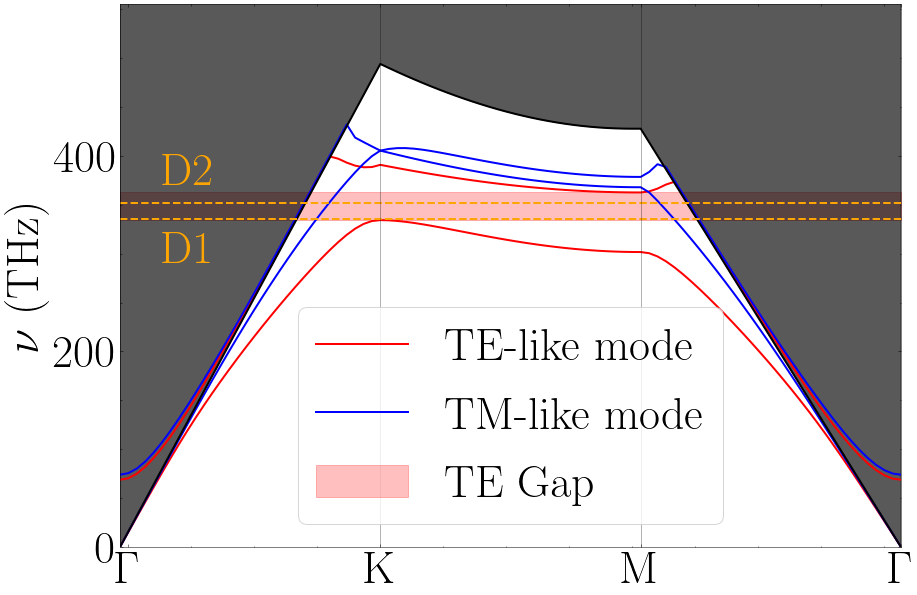

In [52]:
files = [f1,f2,f3]

a = 405e-9 # nm
mpl.rcParams.update({"font.size": 46})

fig, ax = hexagonal_lattice_bands(a, files) #because in nanometers

In [53]:
fig.savefig("band_structure_hexagonal_lattice.pdf")

In [ ]:
f4 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands_slope.dat", delimiter=",")[1:-1,1:]

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

for i in range(1,7):
    
    if i == 1:
        ax.plot(np.linspace(0,len(f1[:,1])-1, len(f1[:,1])), f1[:,-i], c='black', linestyle='dashed', label = 'No  slope')
        ax.plot(np.linspace(0,len(f4[:,1])-1, len(f4[:,1])), f4[:,-i], c='red', linestyle='dashed', alpha=0.5, label = '7.9º  slope') 

    else:
        ax.plot(np.linspace(0,len(f1[:,1])-1, len(f1[:,1])), f1[:,-i], c='black', linestyle='dashed')
        if i > 6:
            continue
        ax.plot(np.linspace(0,len(f4[:,1])-1, len(f4[:,1])), f4[:,-i], c='red', alpha=0.5, linestyle='dashed') 


K_index = int(0.33*len(f1[:,1])) 
M_index = int(0.66*len(f1[:,1])) 
k_point = np.linspace(0,len(f1[:,1])-1, len(f1[:,1]))

k_till_K = np.array([np.linspace(0, 1/np.sqrt(3), K_index +1), np.linspace(0, 1/3,  K_index+1)])
k_till_M = np.array([1/np.sqrt(3)*np.ones(M_index - K_index ), np.linspace(1/3, 0,  M_index - K_index )])
k_till_Gamma = np.array([np.linspace(1/np.sqrt(3), 0, len(f1[:,1]) - M_index), np.zeros(len(f1[:,1]) - M_index)])

ax.fill_between(k_point, np.max(f2[:,-2])*np.ones_like(k_point), np.min(f2[K_index:M_index,-1])*np.ones_like(k_point), color='orange', alpha=0.5, label='TE Gap') 
ks = np.hstack([k_till_K,k_till_M[:,1:],k_till_Gamma])
Light_line = np.sqrt(ks[0,:]**2 + ks[1,:]**2)


ax.plot(k_point,  np.array(Light_line), c='r', label ='Light line')
ax.fill_between(k_point, Light_line, np.ones_like(k_point), color='purple', alpha=0.9, label='Light cone')


plt.axvline(x= K_index, c='black', alpha=0.3)
plt.axvline(x= M_index, c='black', alpha=0.3)


ax.set_xticks([1,  K_index, M_index, len(f1[:,1])])
ax.set_xticklabels(['$\\Gamma$', 'K', 'M','$\\Gamma$'])
ax.set_xlim([0,len(f1[:,1])-1])
ax.set_ylim([0,0.75])
ax.set_xlabel("")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.legend(loc=2)

In [ ]:
if save == True:
    fig.savefig('results/band_diagram_hexagonal_lattice_slope_vs_no_slope.pdf')